In [6]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import util, assign, grants, people, transactions, grantPlanning

In [7]:
#data_dir = 'toydata'
data_dir = 'toydata2'

In [8]:
run = util.run(
    'Aug-22', 
    'Nov-23')
grants_file       = data_dir + '/grants.json'
people_file       = data_dir + '/people.json'
assign_file       = data_dir + '/assignFTE.json'
transactions_file = data_dir + '/transaction.xlsx'
gr = grants.grants(grants_file)
pe = people.people(people_file)
an = assign.assign(assign_file, grants_file, people_file, run)
tr = transactions.transactions(
    transactions_file, people_file, gr.grants['grants'], run)
gpa = grantPlanning.grants_people_assign(gr, pe, an, tr, run)

In [9]:
print(gpa.people.persons)

dict_keys(['Bloggs', 'Wilson'])


Category,Awarded,Spent
Salary,100000,20000
Travel,10000,2000
Equipment,0,0
Consumables,0,0


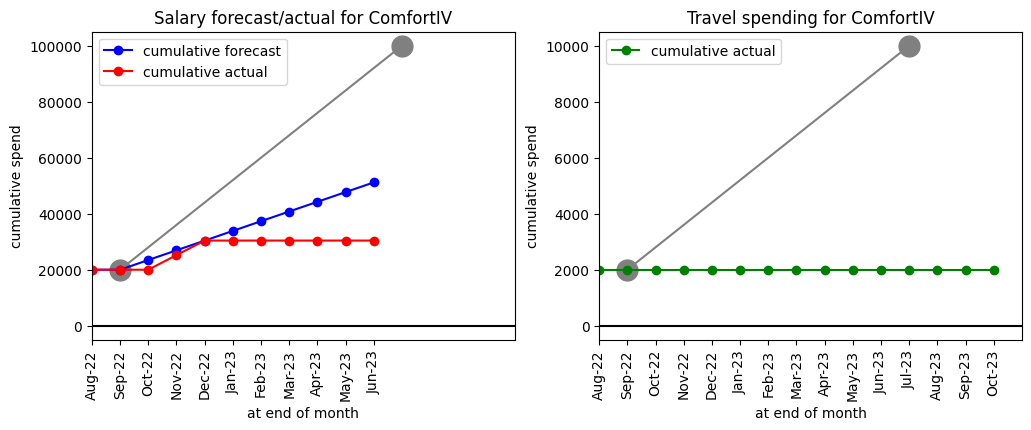

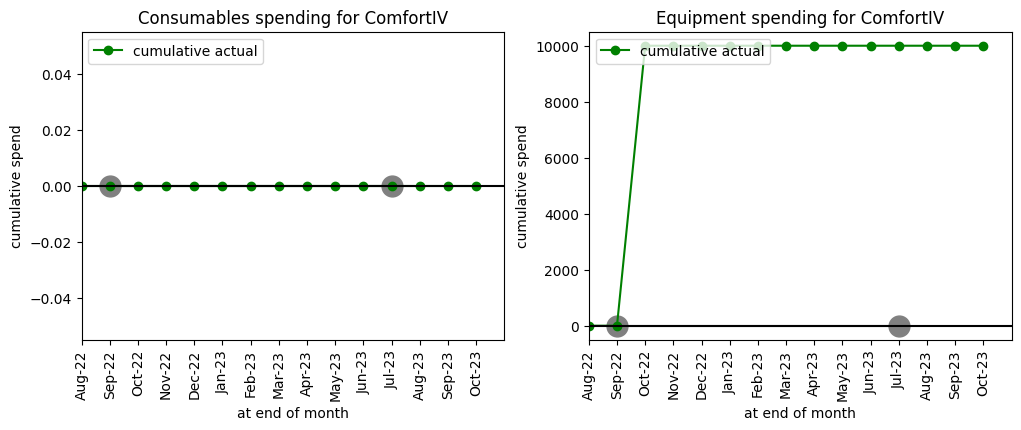

Month,Bloggs,,Monthly,Cumulative,Balance
Aug-22,,,0,20000,80000
Sep-22,,,0,20000,80000
Oct-22,50%,,3465,23465,76535
Nov-22,50%,,3465,26929,73071
Dec-22,50%,,3465,30394,69606
Jan-23,50%,,3465,33859,66141
Feb-23,50%,,3465,37323,62677
Mar-23,50%,,3465,40788,59212
Apr-23,50%,,3465,44253,55747
May-23,50%,,3465,47717,52283


Month,Bloggs
Aug-22,
Sep-22,
Oct-22,
Nov-22,75%
Dec-22,75%
Jan-23,
Feb-23,
Mar-23,
Apr-23,
May-23,


Month,Salary,Travel,Equipment,Consumables
Aug-22,,,,
Sep-22,,,,
Oct-22,,,10000,
Nov-22,5208,,,
Dec-22,5208,,,
Jan-23,,,,
Feb-23,,,,
Mar-23,,,,
Apr-23,,,,
May-23,,,,


Category,Awarded,Spent
Salary,300000,20000
Travel,40000,1000
Equipment,10000,0
Consumables,20000,0


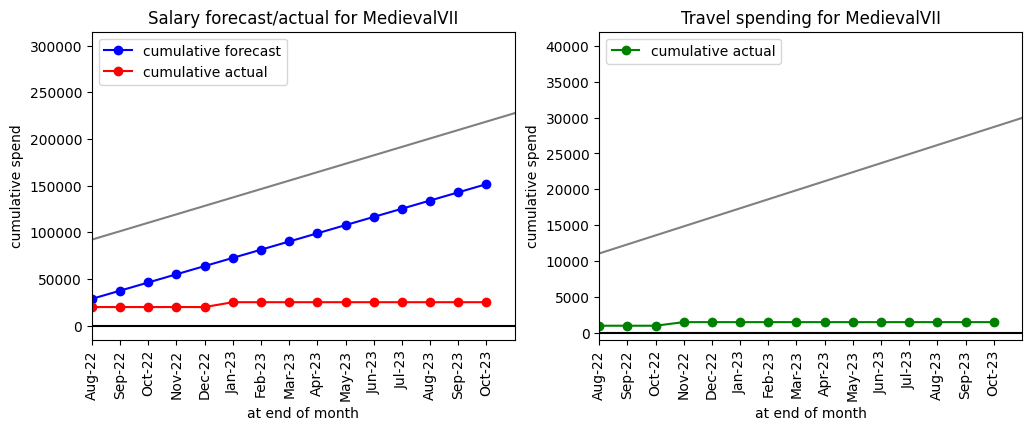

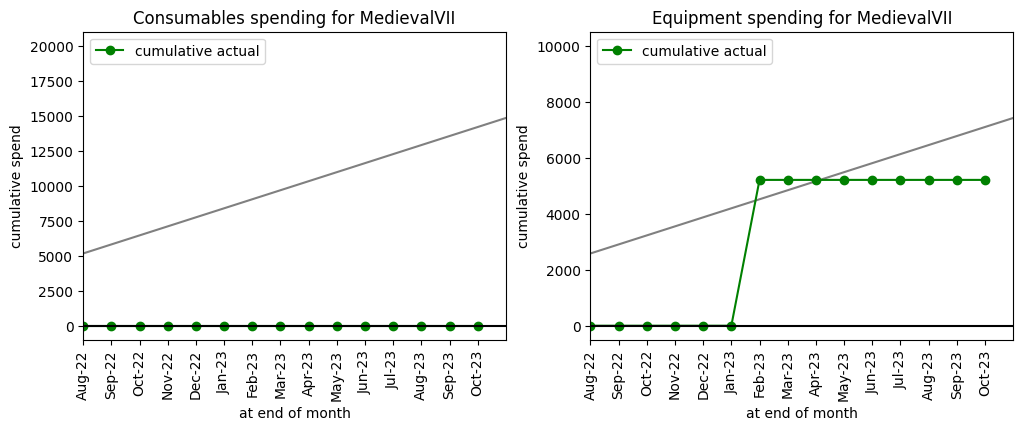

Month,Bloggs,Wilson,,Monthly,Cumulative,Balance
Aug-22,50%,100%,,8780,28780,271220
Sep-22,50%,100%,,8780,37560,262440
Oct-22,50%,100%,,8780,46340,253660
Nov-22,50%,100%,,8780,55120,244880
Dec-22,50%,100%,,8780,63900,236100
Jan-23,50%,100%,,8780,72680,227320
Feb-23,50%,100%,,8780,81460,218540
Mar-23,50%,100%,,8780,90240,209760
Apr-23,50%,100%,,8780,99020,200980
May-23,50%,100%,,8780,107800,192200


Month,Wilson
Aug-22,
Sep-22,
Oct-22,
Nov-22,
Dec-22,
Jan-23,98%
Feb-23,
Mar-23,
Apr-23,
May-23,


Month,Salary,Travel,Equipment,Consumables
Aug-22,,,,
Sep-22,,,,
Oct-22,,,,
Nov-22,,500,,
Dec-22,,,,
Jan-23,5208,,,
Feb-23,,,5208,
Mar-23,,,,
Apr-23,,,,
May-23,,,,


In [10]:
for grant_name in sorted(gpa.grants.keys()):
    display(HTML(gpa.html_grant_header(grant_name)))
    if not 'awarded' in gpa.grants[grant_name]:
        continue

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,   1)
    gpa.plot_forecast_actual_salary(grant_name)
    
    plt.subplot(1,2,   2)
    gpa.plot_category(grant_name, "Travel")
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,   1)
    gpa.plot_category(grant_name, "Consumables")
    
    plt.subplot(1,2,   2)
    gpa.plot_category(grant_name, "Equipment")
    plt.show()
    
    out = gpa.html_forecast_salary  (grant_name)
    if out: display(HTML(out))
    out = gpa.html_actual_salary    (grant_name)
    if out: display(HTML(out))
    out = gpa.html_actual_categories(grant_name)
    if out: display(HTML(out))